#  문제 정의 

농구선수의 경기 기록을 바탕으로 그선수의 포지션을 예측 


## 1. 데이터 수집 

In [1]:
import pandas as pd 

In [2]:
path = './input/basketball_stat.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.columns, df.shape

(Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object'),
 (100, 8))

In [5]:
# 사본 만들기 
df_player = df.iloc[:,:]
df_player

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [6]:
df_player.columns, df_player.shape

(Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object'),
 (100, 8))

In [7]:
# Player
# Pos (SG, C)
# 3P(3점슛)
# 2P(2점슛)
# TRB(리바운드)
# AST(어시스트)
# STL(스틸)
# BLK(블로킹)

## 2. 1차 시각화 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'STL and 2P in 2d plane')

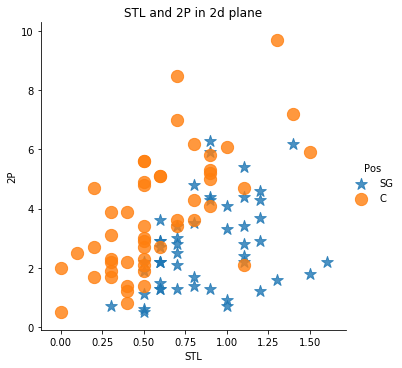

In [9]:
# 스틸, 2점 슛 데이터 시각화 
sns.lmplot('STL', '2P', data=df_player, 
           fit_reg= False , 
           scatter_kws={'s':150},
           markers=['*','o'],
           hue="Pos")

plt.title("STL and 2P in 2d plane")

Text(0.5, 1, 'STL and AST in 2d plane')

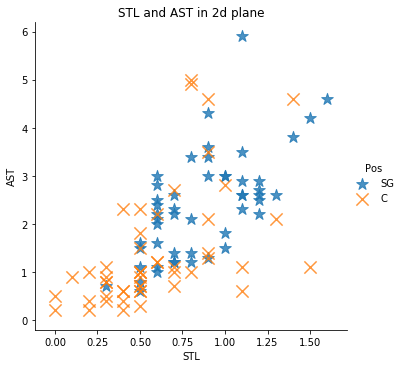

In [10]:
# 스틸, 어시스트 데이터 시각화
sns.lmplot('STL', 'AST', data=df_player, 
           fit_reg= False , 
           scatter_kws={'s':150},
           markers=['*','x'],
           hue="Pos")

plt.title("STL and AST in 2d plane")

Text(0.5, 1, '3P and TRB in 2d plane')

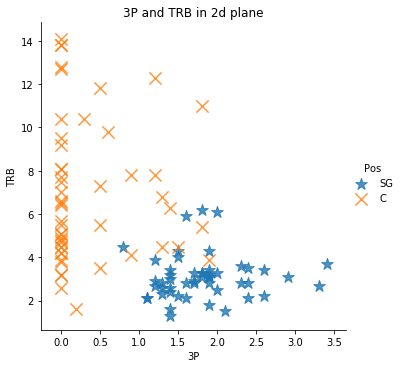

In [11]:
# 3점슛, 리바운드, 데이터 시각화
sns.lmplot('3P', 'TRB', data=df_player, 
           fit_reg= False , 
           scatter_kws={'s':150},
           markers=['*','x'],
           hue="Pos")

plt.title("3P and TRB in 2d plane")

Text(0.5, 1, '3P and BLK in 2d plane')

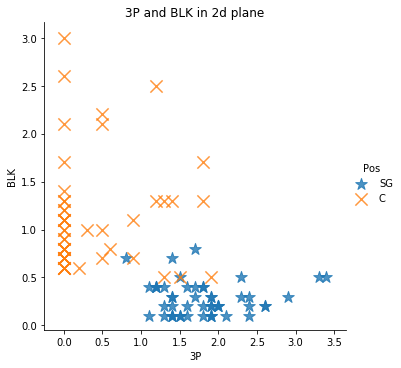

In [12]:
# 3점슛, 리바운드, 데이터 시각화
sns.lmplot('3P', 'BLK', data=df_player, 
           fit_reg= False , 
           scatter_kws={'s':150},
           markers=['*','x'],
           hue="Pos")

plt.title("3P and BLK in 2d plane")

## 3. 데이터 다듬기 

In [13]:
# 변렬력이 없는 특징을 제거
df_player.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [14]:
# 변별력이 없는 특징을 제거 후 확인
df_player.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## 4. 데이터 나누기 (학습, 테스트)

In [15]:
# 데이터 나누기 
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df_player, test_size=0.2)

In [17]:
train.shape[0]

80

In [18]:
test.shape[0]

20

## 5. 정리된 데이터를 저장 

In [19]:
import pickle
with open('./output/basketball_'+'train'+'.pkl'  ,'wb') as train_data: 
    pickle.dump(train, train_data)
    
with open('./output/basketball_'+'test'+'.pkl' ,'wb') as test_data: 
    pickle.dump(train, test_data)

## [ravel 메소드 설명](https://rfriend.tistory.com/349)